## 0. Import

In [4]:
import pandas as pd
import numpy as np
import re
import warnings
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import pickle

In [5]:
pwd

'/Users/kangjiwon/Desktop/LG Aimers/phase2_module/workspace/EDA'

In [6]:
cd ../../..

/Users/kangjiwon/Desktop/LG Aimers


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [7]:
from euqipment import Enquipment
eq = Enquipment()

In [8]:
from phase2_module.src.utils.dataset import Data
from phase2_module.src.models.classification.models import Model
from phase2_module.src.base import BasePiepline
# from phase2_module.src.hyper_parameters.params_optimization import xgboost_opt, set_params_optimization_data
from phase2_module.src.utils.set_seed import seed_everything
from phase2_module.src.utils.top_score_instance import check_the_score

from phase2_module.src.utils.manage_pkl_files import PickleManager as pkl_manager
from phase2_module.src import preprocess
seed_everything()  # NOTE: default 42
_model = Model()

In [9]:
import pandas as pd
import numpy as np
import re, pickle
import warnings
from tqdm import tqdm
warnings.filterwarnings(action='ignore')
def set_up(mode= None):
    pd.set_option('display.max_columns', mode)
set_up()

In [10]:
warnings.filterwarnings('ignore')
%matplotlib inline

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

pd.set_option('float_format', '{:.2f}'.format)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10000)

In [11]:
df = eq.dataframe()

In [12]:
raw = eq.raw_df()

In [17]:
# 동일한 column 제거
df.drop('customer_country.1', axis=1, inplace=True)
# df_test.drop('customer_country.1', axis=1, inplace=True)

KeyError: "['customer_country.1'] not found in axis"

In [13]:
basic = preprocess.Basic
country = preprocess.Country
customer = preprocess.Customer
inquiry = preprocess.Inquiry
product_category = preprocess.ProductCategory
convert_ratio = preprocess.Convert_ratio

# Main

In [14]:
pkls = pkl_manager.map(pkl_manager.loads, pkl_manager.metadata_directory)

runtime_instance = {
    "Train": Data.train,
    "Test": Data.test,
    "Instances":[
        {"instance": basic, "method": ['drop_duplicated'], "params": False},
        {"instance": country, "method": ['apply'], "params": pkls.get("country")},
        {"instance": inquiry, "method": ["apply"], "params": False},
        {"instance": product_category, "method": ["product_categories", 'fill_odds'], "params": {**pkls.get("product_category"), **pkls.get("product_subcategory")}},
        {"instance": customer, "method": ["apply"], "params": pkls.get("customer")},
        {"instance": convert_ratio, "method": ["lead_owner","customer_idx",'lead_owner_customer_idx_means'], "params": {**pkls.get("lead_owner"), **pkls.get("customer_idx")}},
        {"instance": basic, "method": ['cusotmer_idx_categorization'], "params": False},
    ]
}

In [15]:
df = preprocess.runner('Train',**runtime_instance)
# df_test = preprocess.runner('Test',**runtime_instance)

In [55]:
def test(self):
    df['historical_existing_cnt'].fillna(0, inplace=True)
    lead_owner_historical_dict = df.groupby('lead_owner_converted_ratio')['historical_existing_cnt'].mean().sort_values(ascending=False).to_dict()
    df['lead_owner_historical'] = df['lead_owner_converted_ratio'].map(lead_owner_historical_dict)

{54.347826086956516: 88.76190476190476,
 36.84210526315789: 66.36842105263158,
 3.829787234042553: 48.32432432432432,
 5.970149253731343: 32.65151515151515,
 8.91089108910891: 30.484536082474225,
 2.3255813953488373: 27.83582089552239,
 60.0: 23.0,
 13.793103448275861: 18.790697674418606,
 7.990314769975787: 18.087179487179487,
 32.5: 17.675,
 24.675324675324674: 17.18918918918919,
 40.0: 15.830882352941176,
 32.0: 15.695652173913043,
 1.7857142857142856: 15.309090909090909,
 20.634920634920633: 15.008333333333333,
 38.46153846153847: 13.884615384615385,
 2.380952380952381: 13.138211382113822,
 2.4390243902439024: 13.1375,
 7.142857142857142: 12.427536231884059,
 3.508771929824561: 12.105263157894736,
 24.770642201834864: 12.05607476635514,
 9.090909090909092: 11.666666666666666,
 7.738095238095238: 11.560975609756097,
 37.93103448275862: 11.137931034482758,
 4.662004662004662: 11.128712871287128,
 2.17983651226158: 10.954545454545455,
 24.324324324324326: 10.72972972972973,
 41.975308

## 1. Data Analysis

Column Description

| Column Name           | Description                                                                                   |
|-----------------------|-----------------------------------------------------------------------------------------------|
| bant_submit           | MQL 구성 요소 중 Budget(예산), Title(고객의 직책/직급), Needs(요구사항), Timeline(희망 납기일)에 대한 값의 비율 |
| customer_country      | 고객의 국적                                                                                    |
| business_unit         | MQL 요청 상품에 대응되는 사업부                                                               |
| com_reg_ver_win_rate  | Vertical Level 1, business unit, region을 기준으로 oppty 비율을 계산                           |
| customer_idx          | 고객의 회사명                                                                                 |
| customer_type         | 고객 유형                                                                                    |
| enterprise            | Global 기업인지, Small/Medium 규모의 기업인지                                                |
| historical_existing_cnt | 이전에 Converted(영업 전환) 되었던 횟수                                                    |
| id_strategic_ver      | 특정 사업부(Business Unit), 특정 사업 영역(Vertical Level1)에 대해 가중치를 부여           |
| it_strategic_ver      | 특정 사업부(Business Unit), 특정 사업 영역(Vertical Level1)에 대해 가중치를 부여           |
| idit_strategic_ver    | Id_strategic_ver이나 it_strategic_ver 값 중 하나라도 1의 값을 가지면 1 값으로 표현             |
| customer_job          | 고객의 직업군                                                                                 |
| lead_desc_length      | 고객이 작성한 Lead Descriptoin 텍스트 총 길이                                                |
| inquiry_type          | 고객의 문의 유형                                                                              |
| product_category      | 요청 제품 카테고리                                                                            |
| product_subcategory   | 요청 제품 하위 카테고리                                                                       |
| product_modelname     | 요청 제품 모델명                                                                              |
| customer_country.1    | 담당 자사 법인명 기반의 지역 정보(대륙)                                                      |
| customer_position      | 고객의 회사 직책                                                                             |
| response_corporate     | 담당 자사 법인명                                                                             |
| expected_timeline      | 고객의 요청한 처리 일정                                                                      |
| ver_cus               | 특정 Vertical Level 1(사업영역)이면서 Customer_type(고객 유형)이 소비자(End-user)인 경우에 대한 가중치 |
| ver_pro               | 특정 Vertical Level 1(사업영역)이면서 특정 Product Category(제품 유형)인 경우에 대한 가중치           |
| ver_win_rate_x        | 전체 Lead 중에서 Vertical을 기준으로 Vertical 수 비율과 Vertical 별 Lead 수 대비 영업 전환 성공 비율 값을 곱한 값 |
| ver_win_ratio_per_bu  | 특정 Vertical Level1의 Business Unit 별 샘플 수 대비 영업 전환된 샘플 수의 비율을 계산       |
| business_area         | 고객의 사업 영역                                                                              |
| business_subarea      | 고객의 세부 사업 영역                                                                         |
| lead_owner            | 영업 담당자 이름                                                                              |
| is_converted          | 영업 성공 여부. True일 시 성공.                                                               |


In [ ]:
# df.info() # 59298
# df.describe()

### 1.1 Raw & Derivated Values

In [ ]:
# raw data
raw_col = ["bant_submit", "customer_country", "business_unit", "customer_idx", "customer_type", "enterprise", "historical_existing_cnt", "customer_job", "lead_desc_length", "inquiry_type", "product_category", "product_subcategory", "product_modelname", "customer_position", "response_corporate", "expected_timeline", "business_area", "business_subarea", "lead_owner","is_converted"]
raw_df = df[raw_col]

In [ ]:
# Derivated data
all_col = set(df.columns)
derivated_col = all_col.difference(set(raw_col))

derivated_col = list(derivated_col)
derivated_df = df[derivated_col]

In [ ]:
eq.importance()

### 1.2 Missing Value

#### 1.2.1 blabnla/

In [ ]:
raw_df = eq.raw_df()

In [ ]:
eq.is_na(*list(raw_df.columns))

In [ ]:
a

##### 1.1.1 Customer_idx 활용

In [15]:
eq.value_counts('customer_idx','lead_owner')

############# customer_idx ################
customer_idx
47466    7686
25096    2421
37680     367
18030     331
21321     162
         ... 
30268       1
35420       1
19249       1
40327       1
27238       1
Name: count, Length: 35112, dtype: int64
35112


############# lead_owner ################
lead_owner
174     4627
175     4120
97      2499
23      2453
194     2208
42      1215
96       981
185      880
363      839
115      734
38       693
125      690
402      490
108      487
124      468
816      464
341      462
167      459
100      457
0        429
68       427
16       413
487      405
176      374
40       355
342      346
662      327
422      326
27       317
359      305
205      304
39       304
15       301
279      294
441      281
25       272
155      271
103      270
233      265
374      257
405      246
393      238
589      237
46       235
21       228
831      227
78       223
436      219
148      216
642      215
153      215
694      213
654      20

In [16]:
len(raw_df[(raw_df['customer_idx']==25096)&(raw_df['is_converted']==True)])

2421

In [20]:
df.groupby('lead_owner_converted_ratio')['customer_idx'].unique().sort_index(ascending=False)

customer_idx
47466    [False, True]
47465          [False]
47464          [False]
47460          [False]
47459          [False]
             ...      
8              [False]
7              [False]
5              [False]
3              [False]
2              [False]
Name: is_converted, Length: 35112, dtype: object

In [18]:
# df.columns
# raw_df.groupby('customer_idx')['is_converted'].value_counts().sort_index(ascending=False)

result = raw_df.groupby('customer_idx')['is_converted'].unique().sort_index(ascending=False).reset_index()
filtered_result_one = result[result['is_converted'].apply(len) == 1]
filtered_result_not_one = result[result['is_converted'].apply(len) != 1]
len(filtered_result)

# 'customer_idx'로 groupby한 데이터셋에서 True 또는 False 전환 비율이 1이 아닌 row의 수는 전체 개수 - 219
# 0.006237 정도가 비율이 1또는 0이 아님

NameError: name 'filtered_result' is not defined

In [ ]:
# len(raw_df)
len(filtered_result)
len(filtered_result_not_one)
219/35112

In [19]:
result

,customer_idx,is_converted
0,47466,"[False, True]"
1,47465,[False]
2,47464,[False]
3,47460,[False]
4,47459,[False]
...,...,...
35107,8,[False]
35108,7,[False]
35109,5,[False]
35110,3,[False]


In [45]:
raw_df.groupby(['customer_idx','lead_owner'])['is_converted'].value_counts().sort_values(ascending=False)

customer_idx  is_converted
47466         False           7619
25096         True            2421
37680         False            363
18030         False            330
21321         False            161
33350         False            135
43395         False             91
25309         False             90
33763         False             88
32240         False             83
37654         False             76
31864         False             71
47466         True              67
37657         False             65
19804         False             64
29370         False             61
40344         False             58
21389         False             50
7195          False             50
37399         False             43
42067         False             43
14746         True              38
33776         False             33
742           False             30
6555          False             29
1747          False             28
46271         False             27
40491         False         

In [434]:
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import decomposition

X_scaled = StandardScaler().fit_transform(X)

pca = decomposition.PCA(n_components=13)
pca_X = pca.fit_transform(X_scaled)

# 주성분으로 이루어진 데이터 프레임 구성
PAC_df = pd.DataFrame(data=pca_X)

In [435]:
import numpy as np
np.set_printoptions(precision=10, suppress=True)

In [436]:
pca.explained_variance_ratio_

array([0.1832867355, 0.101363386 , 0.088389455 , 0.0853946228,
       0.0777309572, 0.0770999322, 0.0742884259, 0.0703961381,
       0.0660020023, 0.0633528243, 0.0565128713, 0.0294426035,
       0.0267400461])

In [432]:
sum(pca.explained_variance_ratio_)

0.9438173504238992

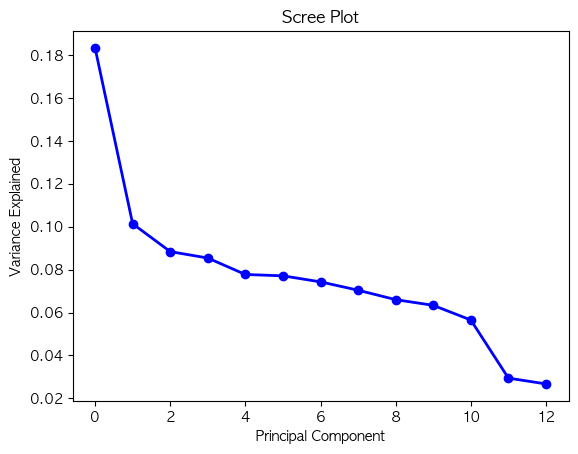

In [424]:
# Scree plot 통해 확인
PC_values = np.arange(pca.n_components_)
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()